In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
data_train = pd.read_csv('../data_cleaned/data_train.csv')
item_categories = pd.read_csv('../data_cleaned/item_categories.csv')
items = pd.read_csv('../data_cleaned/items.csv')
shops = pd.read_csv('../data_cleaned/shops.csv')

In [5]:
data_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,06.01.2013,0,25,2554,1709.05,1.0
3,15.01.2013,0,25,2555,1099.00,1.0
4,10.01.2013,0,25,2564,349.00,1.0
...,...,...,...,...,...,...
2928480,10.10.2015,33,25,7409,299.00,1.0
2928481,09.10.2015,33,25,7460,299.00,1.0
2928482,14.10.2015,33,25,7459,349.00,1.0
2928483,22.10.2015,33,25,7440,299.00,1.0


In [6]:
merged = data_train.merge(items, how='left').merge(item_categories, how='left').merge(shops, how='left')
merged.isna().sum()

date                  0
date_block_num        0
shop_id               0
item_id               0
item_price            0
item_cnt_day          0
item_name             0
item_category_id      0
item_category_name    0
shop_name             0
dtype: int64

In [7]:
merged

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
2,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
3,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум"""
4,10.01.2013,0,25,2564,349.00,1.0,DEEP PURPLE Perihelion: Live In Concert DVD (К...,59,Музыка - Музыкальное видео,"Москва ТРК ""Атриум"""
...,...,...,...,...,...,...,...,...,...,...
2928480,10.10.2015,33,25,7409,299.00,1.0,V/A Nu Jazz Selection (digipack),55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
2928481,09.10.2015,33,25,7460,299.00,1.0,V/A The Golden Jazz Collection 1 2CD,55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
2928482,14.10.2015,33,25,7459,349.00,1.0,V/A The Best Of The 3 Tenors,55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
2928483,22.10.2015,33,25,7440,299.00,1.0,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,Музыка - MP3,"Москва ТРК ""Атриум"""


In [8]:
def parse_city(shop_name):
    if shop_name.split()[0] == '!Якутск':
        return  'Якутск'

    if shop_name.split()[0] == 'Сергиев':
            return  'Сергиев Посад'
    else:
        return shop_name.split()[0]


In [9]:
merged['city'] = merged['shop_name'].apply(parse_city)
merged['city'].unique()

array(['Ярославль', 'Москва', 'Курск', 'Красноярск', 'Волжский',
       'Воронеж', 'Адыгея', 'Балашиха', 'Якутск', 'Коломна', 'Калуга',
       'Жуковский', 'Казань', 'Интернет-магазин', 'Уфа', 'Н.Новгород',
       'Чехов', 'Химки', 'Сургут', 'Тюмень', 'СПб', 'РостовНаДону',
       'Омск', 'Самара', 'Новосибирск', 'Сергиев Посад', 'Вологда',
       'Цифровой', 'Выездная', 'Томск', 'Мытищи'], dtype=object)

In [10]:
def supercategory(name):
    return name.split()[0]

In [11]:
merged['item_category_name'].apply(supercategory).unique()

array(['Кино', 'Музыка', 'Игры', 'Программы', 'Книги', 'Подарки',
       'Аксессуары', 'Игровые', 'Карты', 'Чистые', 'Служебные', 'PC',
       'Элементы', 'Доставка', 'Билеты'], dtype=object)

In [12]:
merged['super_category'] = merged['item_category_name'].apply(supercategory)

In [13]:
print('items:\n\n')
print(merged['item_name'].value_counts())
print('\n\nshops:\n\n')
print(merged['shop_name'].value_counts())
print('\n\ncategories:\n\n')
print(merged['item_category_name'].value_counts())
print('\n\ncities:\n\n')
print(merged['city'].value_counts())

print('\n\nsupercategoties:\n\n')
print(merged['super_category'].value_counts())

items:


item_name
Фирменный пакет майка 1С Интерес белый (34*42) 45 мкм                                    31337
Playstation Store пополнение бумажника: Карта оплаты 1000 руб.                            9404
Прием денежных средств для 1С-Онлайн                                                      9067
Diablo III [PC, Jewel, русская версия]                                                    7470
Kaspersky Internet Security Multi-Device Russian Edition. 2-Device 1 year Renewal Box     6850
                                                                                         ...  
АССА (rem)                                                                                   1
СБ. Город не спит  Mixed By Dj Yankovski                                                     1
Фигурка Gears of War 2 Series 6 Boomer Mauler 7"                                             1
Командир. Западный фронт [PC, Jewel]                                                         1
Брелок мягкий "Кошка с рыбкой",

In [14]:
check_trend_items = ['Фирменный пакет майка 1С Интерес белый (34*42) 45 мкм',
                     'Kaspersky Internet Security Multi-Device Russian Edition. 2-Device 1 year Renewal Box',
                     'Tomb Raider [PC, Jewel, русская версия]'
                    ]

check_trend_shops = ['Москва ТЦ "Семеновский"',
                     'Уфа ТК "Центральный"',
                     'Якутск Орджоникидзе, 56',
                     'Интернет-магазин ЧС'
                    ]
check_trend_categories = ['Кино - DVD',
                          'Музыка - CD локального производства',
                          'Кино - Blu-Ray']

check_trend_super_categories = ['Игры',
                          'Аксессуары',
                          'Служебные']



Check trends:
- by item
- by item+by shop
- by category
- by supergategory
- all of them by season, in general

In [15]:
merged['date'] = pd.to_datetime(merged['date'], format='%d.%m.%Y')

In [16]:
def get_day(time):
    return time.day

def get_day_of_week(time):
    return time.day_of_week

def get_month(time):
    return time.month

In [17]:
day=merged['date'].apply(get_day)
day_of_week=merged['date'].apply(get_day_of_week)
monthes=merged['date'].apply(get_month)

In [18]:
print('days:',day.unique())
print('day of weeks',day_of_week.unique())
print('monthes:',monthes.unique())

days: [ 2  3  6 15 10  4 11  5  7  8 13 16 26 27  9 29 12 23 25 30 19 20 24 21
 22 28 14 31 17 18  1]
day of weeks [2 3 6 1 4 5 0]
monthes: [ 1  2  3  4  5  6  7  8  9 10 11 12]


In [19]:
merged['day'] = day
merged['day_of_week'] = day_of_week
merged['month'] = monthes

In [20]:
print(len(merged))

2928485


In [21]:
#check how many times (shop_id,item_id,date are met together)
def delete_repetitive_shop_item_date(merged):
    grouped = merged.groupby(by=['shop_id','date','item_id'])
    print('total unique (shop_id,item_id,date)',len(grouped.size()))
    print('total REPETITIVE (shop_id,item_id,date)',(grouped.size() != 1).sum())
    grouped_items_count = grouped.size()
    double = grouped_items_count[grouped_items_count > 1]
    double

    index_pairs= []
    index = []
    for el in double.index:
        dup = merged[(merged['shop_id']==el[0]) & (merged['date']==el[1]) & (merged['item_id']==el[2])]
        index_pairs.append(dup.index)
        index.extend(dup.index)
        
    merged.iloc[index]#average them

    new_rows=[]
    for pair in index_pairs:
        df = merged.iloc[pair]
        avg_price = df['item_price'].mean()
        new_row = df.loc[pair[0]].copy()  # Copy the first row in the pair as a template
        new_row['item_price'] = avg_price
        new_rows.append(new_row)
    #print(pd.DataFrame(new_rows)['item_price'])
    print(len(pd.DataFrame(new_rows)))
    
    merged = merged.drop(index)
    
    # Append the new rows with averaged values to the DataFrame
    merged = pd.concat([merged, pd.DataFrame(new_rows)], ignore_index=True,verify_integrity=True)
    print(len(merged))
    return merged
    

In [22]:
""""
USE THIS ONLY ONES
"""
merged=delete_repetitive_shop_item_date(merged)

total unique (shop_id,item_id,date) 2928465
total REPETITIVE (shop_id,item_id,date) 20
20
2928465


<Axes: >

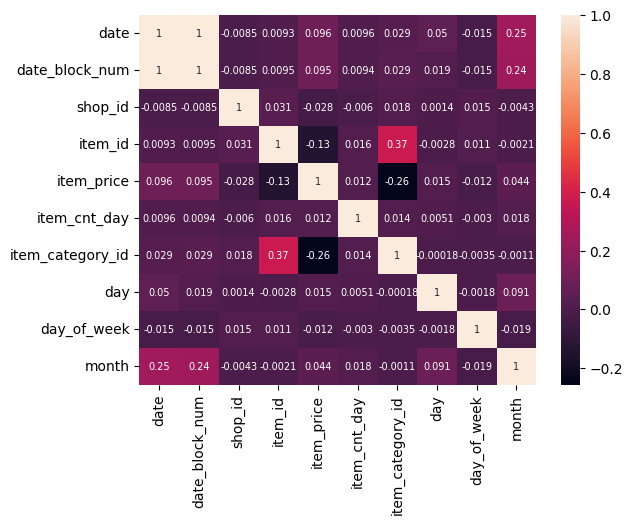

In [23]:
sns.heatmap(merged.drop(['item_name','item_category_name','shop_name','city','super_category'], axis=1).corr(),annot=True,annot_kws={'fontsize':7})

PLOT GENERAL TENDECIES

In [24]:
def plot_feature_items_cnt_day(feature = None,items=None):
    """
    plot by avaraging across all shops where it were sold
    """
    df0 = merged[merged[feature]==items[0]]
    gr0 = df0.groupby('date')['item_cnt_day'].mean().reset_index()
    df1 = merged[merged[feature]==items[1]]
    gr1 = df1.groupby('date')['item_cnt_day'].mean().reset_index()
    df2 = merged[merged[feature]==items[2]]
    gr2 = df2.groupby('date')['item_cnt_day'].mean().reset_index()
    
    fig, ax = plt.subplots(figsize=(20,8),nrows=1,ncols=3)
    ax[0].plot(gr0['date'], gr0['item_cnt_day'])
    ax[1].plot(gr1['date'], gr1['item_cnt_day'])
    ax[2].plot(gr2['date'], gr2['item_cnt_day'])
    
    


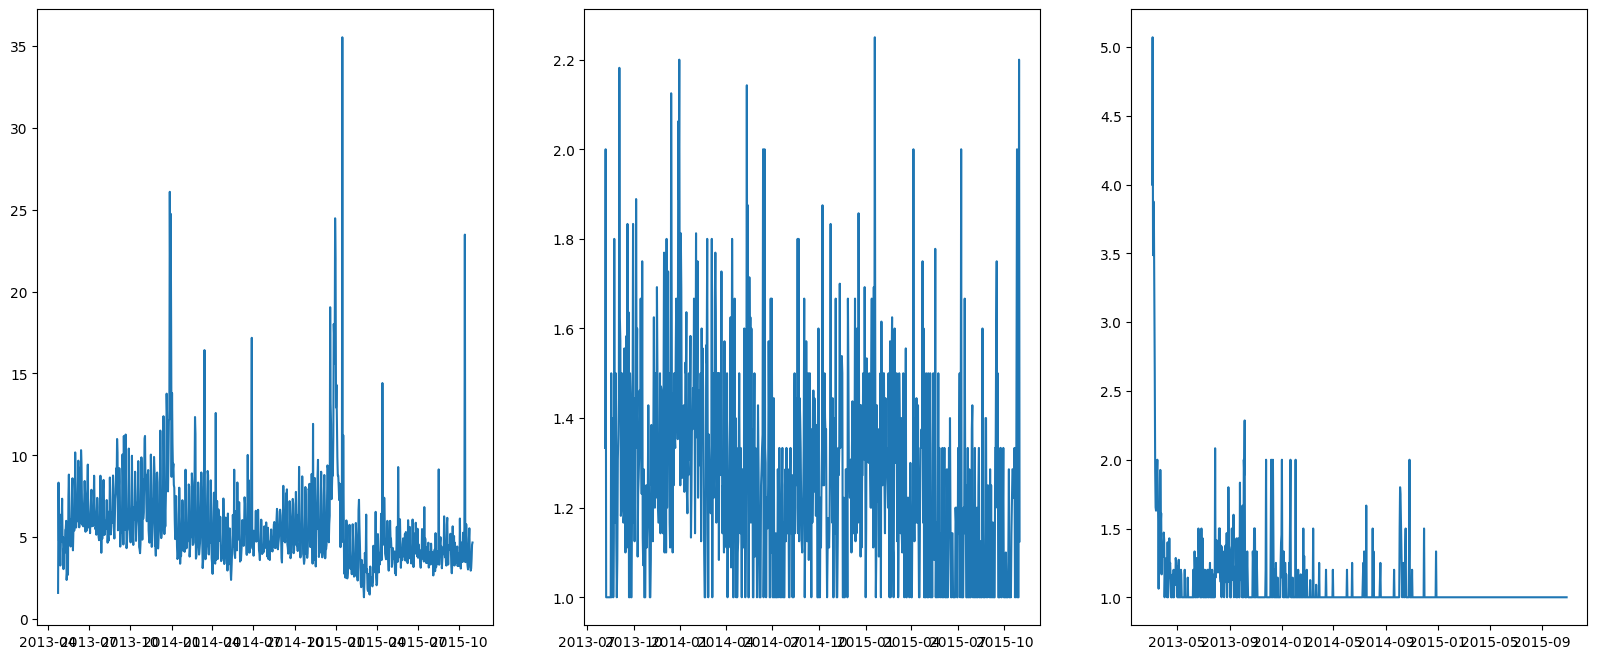

In [25]:
#plot_item_price('Фирменный пакет майка 1С Интерес белый (34*42) 45 мкм')
plot_feature_items_cnt_day(feature='item_name',items=check_trend_items)

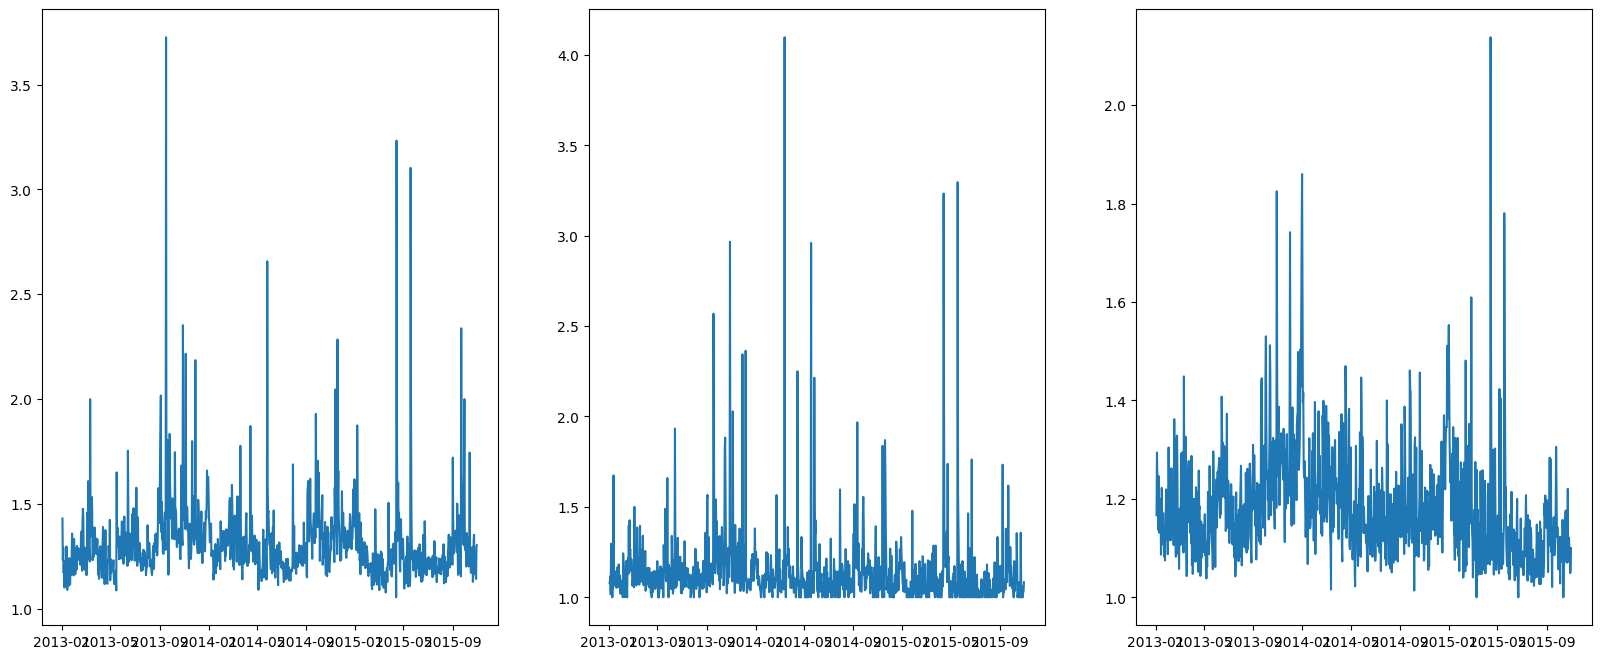

In [26]:
#plot_item_price('Фирменный пакет майка 1С Интерес белый (34*42) 45 мкм')
plot_feature_items_cnt_day(feature='shop_name',items=check_trend_shops)

In [27]:
import matplotlib.pyplot as plt

def plot_averaged_by_2_features_cnt_day(feature_1=None, feature_2=None,values_1=None, values_2=None,plot_by='date'):

    # Filter and group the data for the first item and shop
    df0 = merged[(merged[feature_1] == values_1[0]) & (merged[feature_2] == values_2[0])]
    gr0 = df0.groupby(plot_by)['item_cnt_day'].mean().reset_index()
    
    # Filter and group the data for the second item and shop
    df1 = merged[(merged[feature_1] == values_1[1]) & (merged[feature_2] == values_2[1])]
    gr1 = df1.groupby(plot_by)['item_cnt_day'].mean().reset_index()
    
    # Filter and group the data for the third item and shop
    df2 = merged[(merged[feature_1] == values_1[2]) & (merged[feature_2] == values_2[2])]
    gr2 = df2.groupby(plot_by)['item_cnt_day'].mean().reset_index()
    
    # Create subplots
    fig, ax = plt.subplots(figsize=(20, 8), nrows=1, ncols=3)
    
    # Plot the first item and shop data
    ax[0].plot(gr0[plot_by], gr0['item_cnt_day'])
    ax[0].set_title(f'{values_1[0]} + {values_2[0]}', fontdict={'fontsize': 7})
    
    # Plot the second item and shop data
    ax[1].plot(gr1[plot_by], gr1['item_cnt_day'])
    ax[1].set_title(f'{values_1[1]} + {values_2[1]}', fontdict={'fontsize': 7})
    
    # Plot the third item and shop data
    ax[2].plot(gr2[plot_by], gr2['item_cnt_day'])
    ax[2].set_title(f'{values_1[2]} + {values_2[2]}', fontdict={'fontsize': 7})
    
    plt.tight_layout()
    plt.show()
    

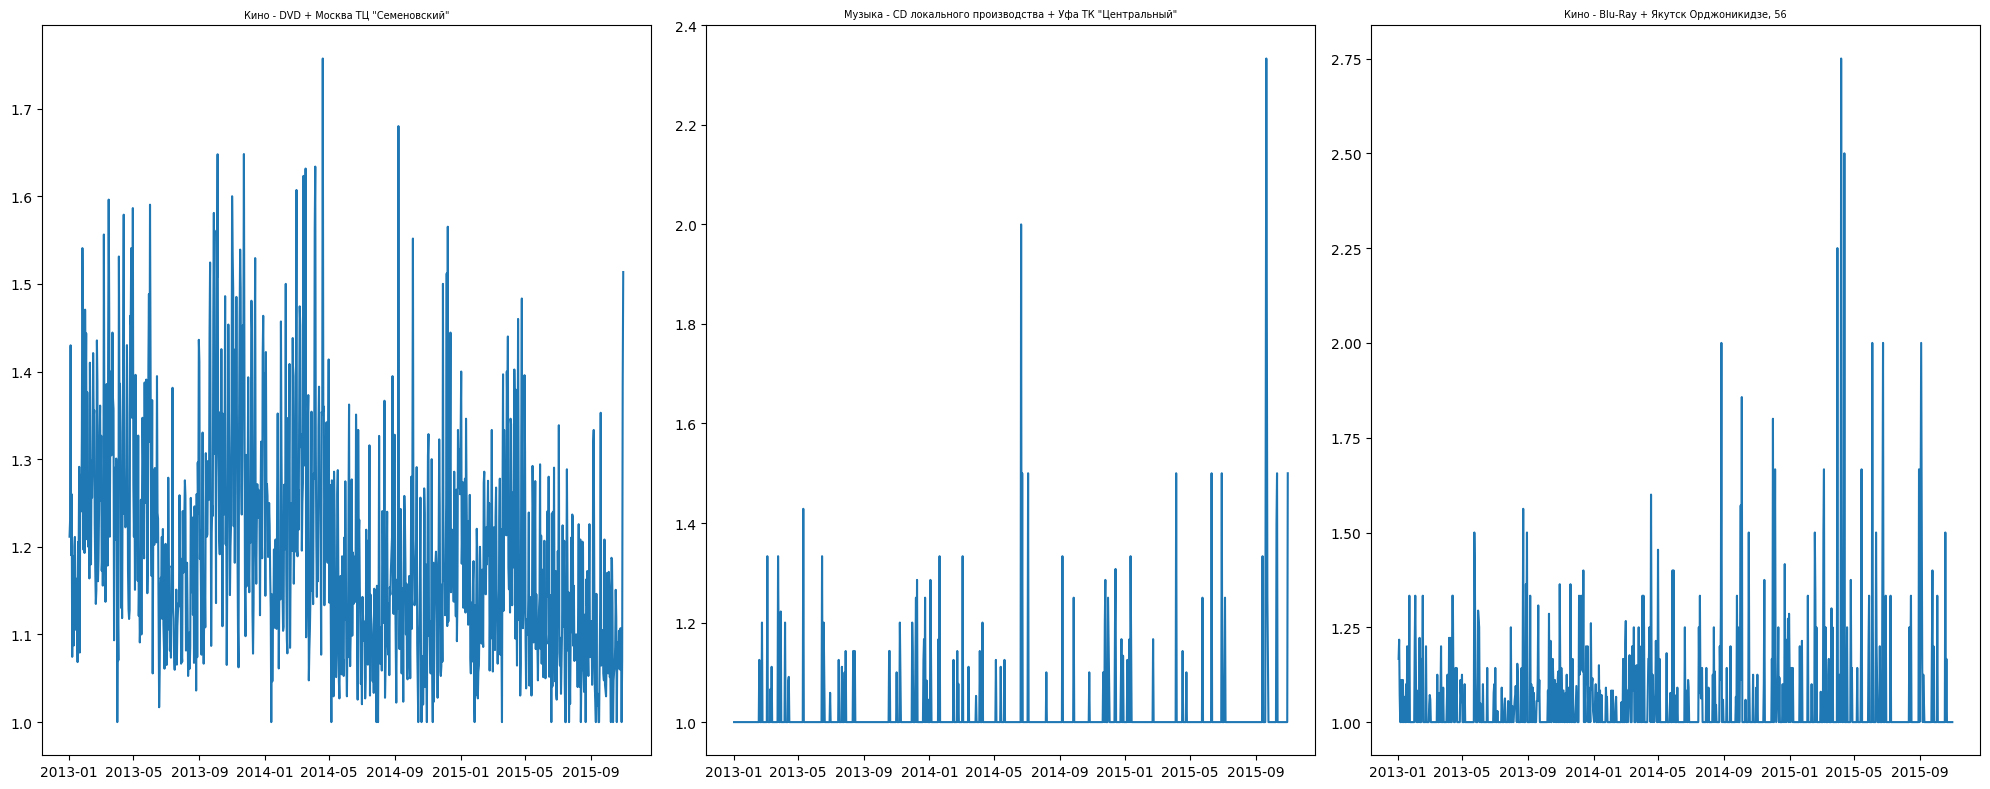

In [28]:

plot_averaged_by_2_features_cnt_day(feature_1='item_category_name',
                                    feature_2='shop_name',
                                    values_1=check_trend_categories,
                                    values_2=check_trend_shops ,
                                    plot_by='date')

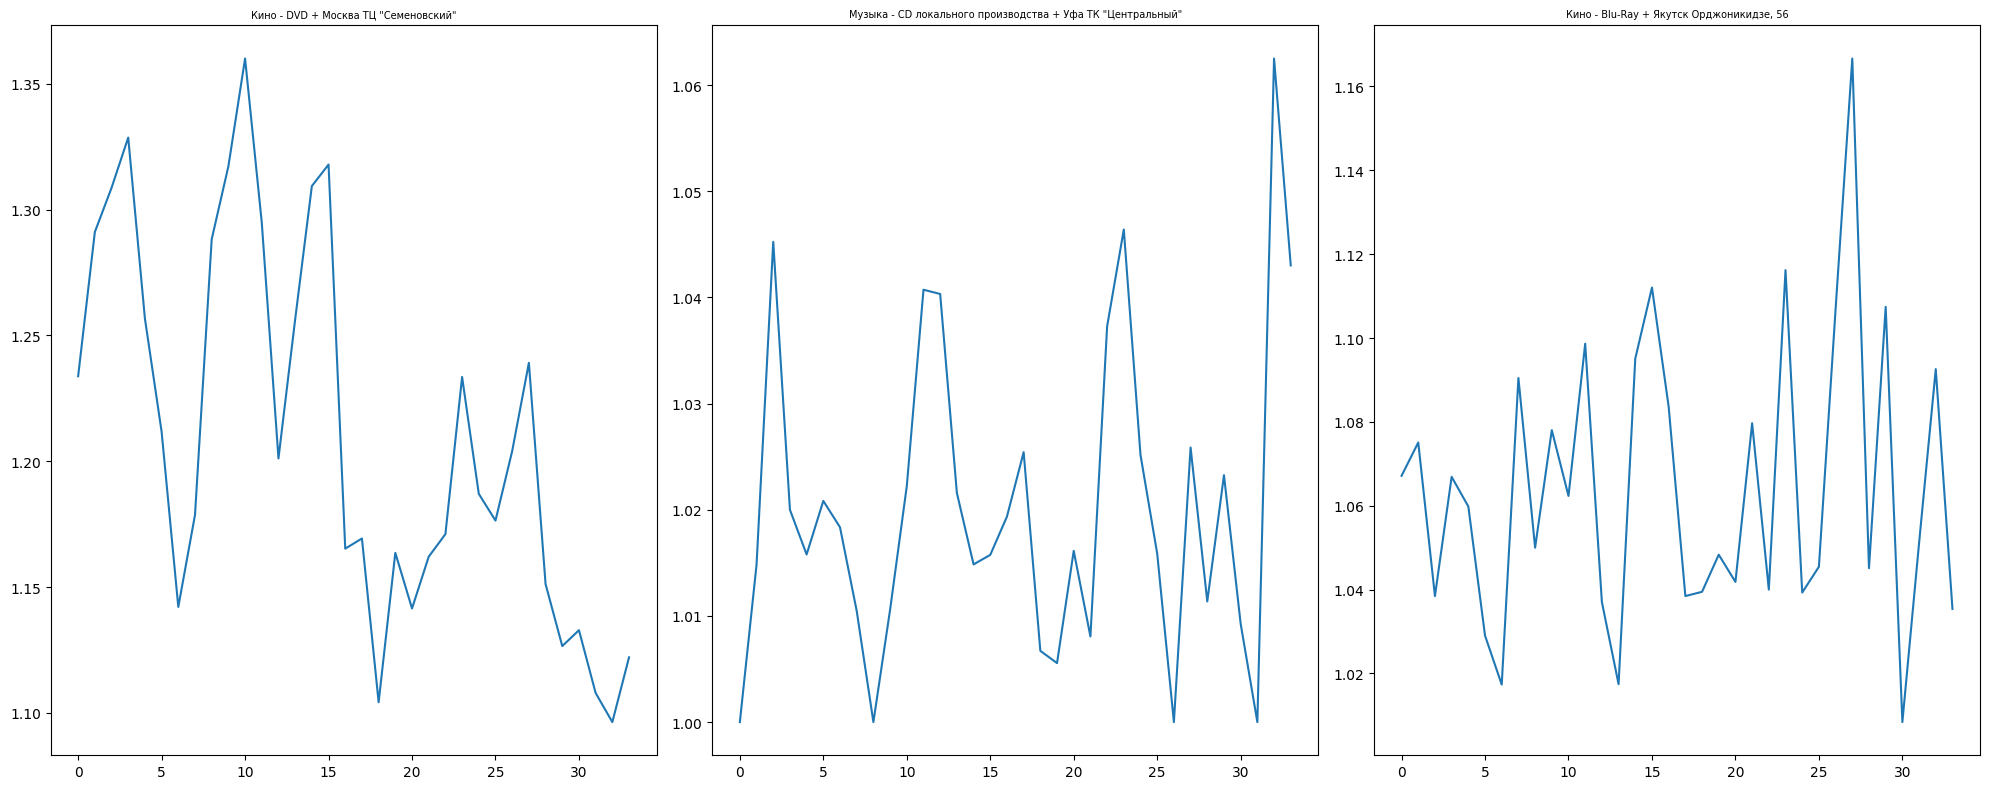

In [29]:

plot_averaged_by_2_features_cnt_day(feature_1='item_category_name',
                                    feature_2='shop_name',
                                    values_1=check_trend_categories,
                                    values_2=check_trend_shops ,
                                    plot_by='date_block_num')

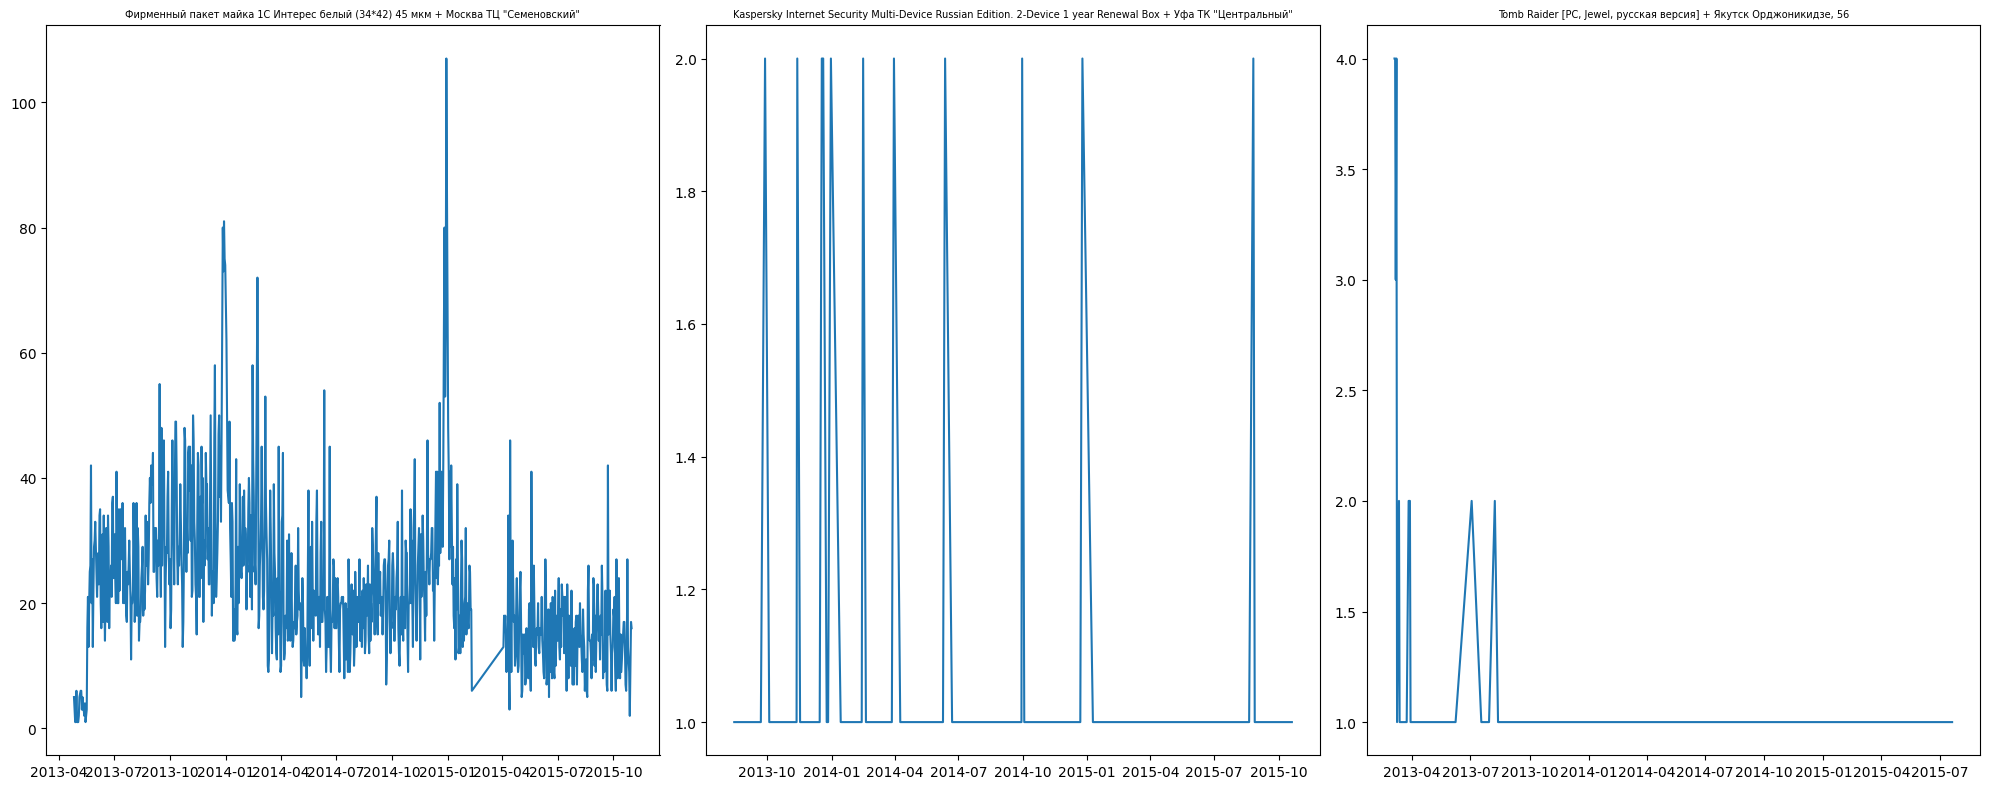

In [30]:
plot_averaged_by_2_features_cnt_day(feature_1='item_name',
                                    feature_2='shop_name',
                                    values_1=check_trend_items,
                                    values_2=check_trend_shops ,
                                    plot_by='date')

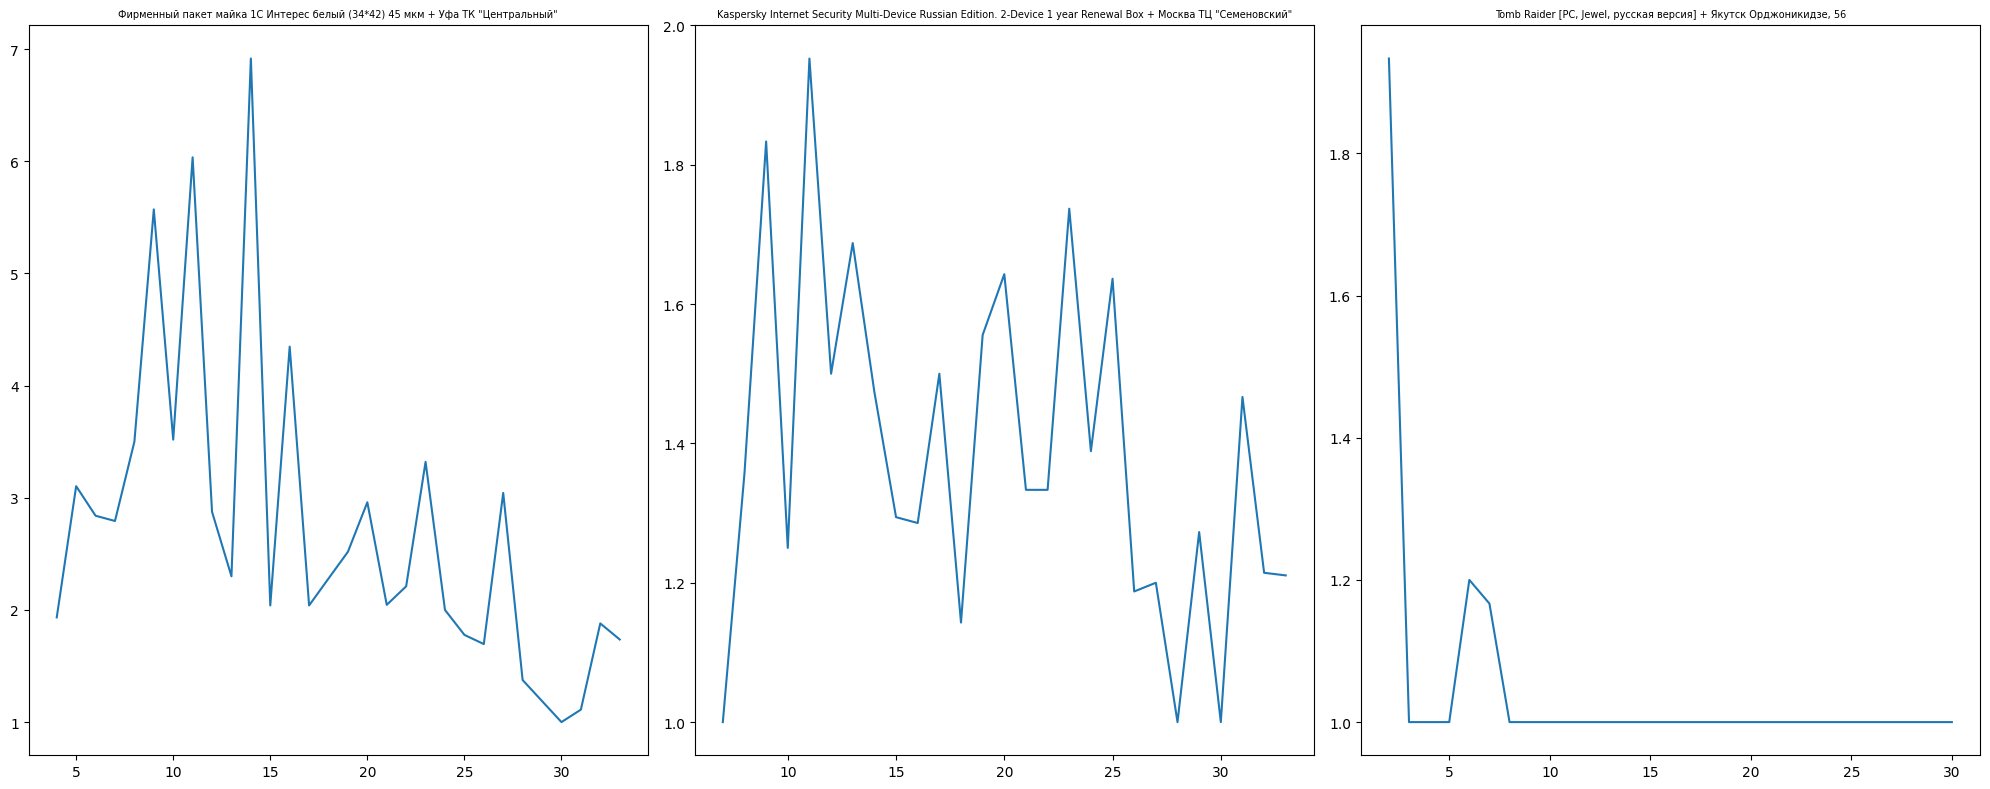

In [31]:
check_trend_shops[0],check_trend_shops[1],check_trend_shops[2] = check_trend_shops[1],check_trend_shops[0],check_trend_shops[2]
plot_averaged_by_2_features_cnt_day(feature_1='item_name',
                                    feature_2='shop_name',
                                    values_1=check_trend_items,
                                    values_2=check_trend_shops ,
                                    plot_by='date_block_num')

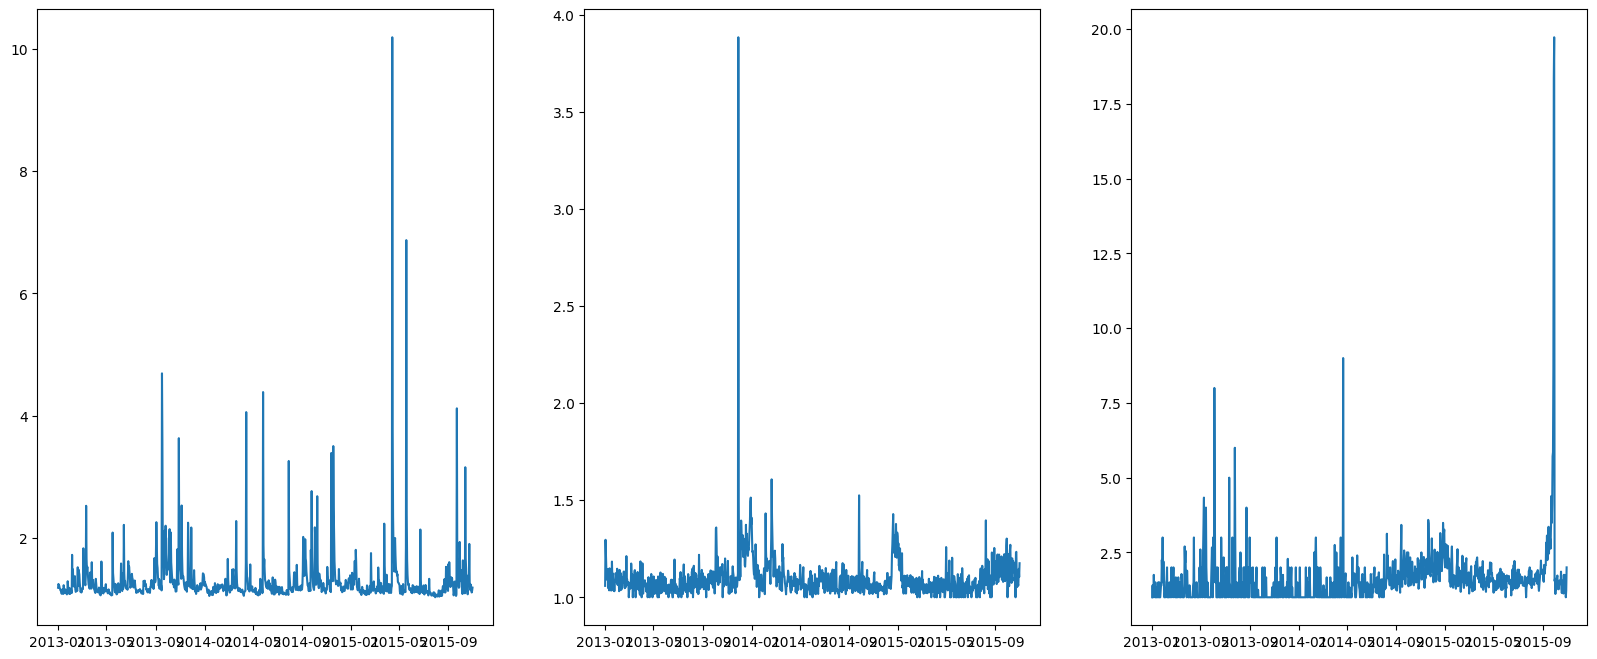

In [32]:
plot_feature_items_cnt_day(feature='super_category',items=check_trend_super_categories)

shop_id,item_id

In [33]:
grouped=merged.groupby(['shop_id','item_id','date_block_num']).agg({'item_price':'mean',
                                                                    'item_cnt_day':'sum',
                                                                    'item_category_name':'unique',
                                                                    'month':'unique',
                                                                    'super_category':'unique',
                                                                   })#take some time

In [34]:
#grouped['item_category_name']=grouped['item_category_name'].apply(lambda a:a[0] if len(a)==1 else None)
#grouped['month']=grouped['month'].apply(lambda a:a[0] if len(a)==1 else None)\
grouped['super_category']=grouped['super_category'].apply(lambda a:a[0] if len(a)==1 else None)

In [35]:
grouped['item_category_name']=grouped['item_category_name'].apply(lambda a:a[0] if len(a)==1 else None)
grouped['month']=grouped['month'].apply(lambda a:a[0] if len(a)==1 else None)\
#grouped['super_category']=grouped['super_category'].apply(lambda a:a[0] if len(a)==1 else None)

In [36]:
grouped=grouped.rename({'item_price':'avg_item_price','item_cnt_day':'item_cnt_month'}, axis='columns')

In [37]:
grouped.isna().sum()

avg_item_price        0
item_cnt_month        0
item_category_name    0
month                 0
super_category        0
dtype: int64

In [38]:
grouped

avg_item_price  item_cnt_month  \
shop_id item_id date_block_num                                   
2       27      0                       2499.0             1.0   
                17                       498.0             1.0   
        30      2                        359.0             1.0   
                5                        399.0             1.0   
                15                       169.0             1.0   
...                                        ...             ...   
59      22164   27                       699.0             2.0   
                30                       699.0             1.0   
        22167   9                        299.0             1.0   
                11                       299.0             2.0   
                17                       299.0             1.0   

                                               item_category_name  month  \
shop_id item_id date_block_num                                             
2       27      0                                      Игры - PS3      1   
                17                                     Игры - PS3      6   
        30      2                                      Кино - DVD      3   
                5                                      Кино - DVD      6   
                15                                     Кино - DVD      4   
...                                                           ...    ...   
59      22164   27                                 Кино - Blu-Ray      4   
                30                                 Кино - Blu-Ray      7   
        22167   9               Книги - Методические материалы 1С     10   
                11              Книги - Методические материалы 1С     12   
                17              Книги - Методические материалы 1С      6   

                               super_category  
shop_id item_id date_block_num                 
2       27      0                        Игры  
                17                       Игры  
        30      2                        Кино  
                5                        Кино  
                15                       Кино  
...                                       ...  
59      22164   27                       Кино  
                30                       Кино  
        22167   9                       Книги  
                11                      Книги  
                17                      Книги  

[1608225 rows x 5 columns]

In [39]:
grouped=grouped.reset_index()

In [40]:
grouped

,shop_id,item_id,date_block_num,avg_item_price,item_cnt_month,item_category_name,month,super_category
0,2,27,0,2499.0,1.0,Игры - PS3,1,Игры
1,2,27,17,498.0,1.0,Игры - PS3,6,Игры
2,2,30,2,359.0,1.0,Кино - DVD,3,Кино
3,2,30,5,399.0,1.0,Кино - DVD,6,Кино
4,2,30,15,169.0,1.0,Кино - DVD,4,Кино
...,...,...,...,...,...,...,...,...
1608220,59,22164,27,699.0,2.0,Кино - Blu-Ray,4,Кино
1608221,59,22164,30,699.0,1.0,Кино - Blu-Ray,7,Кино
1608222,59,22167,9,299.0,1.0,Книги - Методические материалы 1С,10,Книги
1608223,59,22167,11,299.0,2.0,Книги - Методические материалы 1С,12,Книги


In [41]:
grouped_month_cat=grouped.groupby(['month','super_category']).agg({'avg_item_price':'mean','item_cnt_month':'sum'})

In [42]:
grouped_month_cat=grouped_month_cat.reset_index()

In [43]:
grouped_month_cat

,month,super_category,avg_item_price,item_cnt_month
0,1,PC,148.000000,1.0
1,1,Аксессуары,1912.827856,10829.0
2,1,Доставка,726.484423,774.0
3,1,Игровые,13797.224777,3310.0
4,1,Игры,1044.253027,128338.0
...,...,...,...,...
161,12,Подарки,912.219517,78322.0
162,12,Программы,1894.749413,5561.0
163,12,Служебные,1072.727461,2094.0
164,12,Чистые,53.461538,187.0


In [44]:
def plot_colored_lines(data=None,x_name=None,y_name=None,hue_name=None,ylim=50000):
    """
    parameters are column names
    """
    # Set plot style
    sns.set(style="whitegrid")
    
    # Create the line plot
    plt.figure(figsize=(10, 6))
    line_plot=sns.lineplot(x=x_name, y=y_name, hue=hue_name, data=data, marker='o')
    legend_labels = [t.get_text() for t in plt.gca().get_legend().get_texts()]
    
    for i,line in enumerate(line_plot.get_lines()[0:len(line_plot.get_lines())//2]):
        # Get the label for the line (super_category)
        label = line.get_label()
        
        # Get the x and y data from the line
        x_data = line.get_xdata()
        y_data = line.get_ydata()
        #print(x_data)
        # Place the label at the last point of the line
        if ylim is None:
            if len(x_data) > 0:
                plt.text(x_data[-1] + 0.1, y_data[-1], legend_labels[i], horizontalalignment='left', size='small', color=line.get_color())
        elif len(x_data) > 0 and y_data[-1] <= ylim:
            plt.text(x_data[-1] + 0.1, y_data[-1], legend_labels[i], horizontalalignment='left', size='small', color=line.get_color())

    
    # Add labels and title
    #plt.title('Item Count per Moth by Category')
    plt.xlabel(x_name)
    plt.ylabel(y_name)

    plt.ylim(0,ylim)
    # Show the plot
    plt.legend('',frameon=False)
    plt.show()

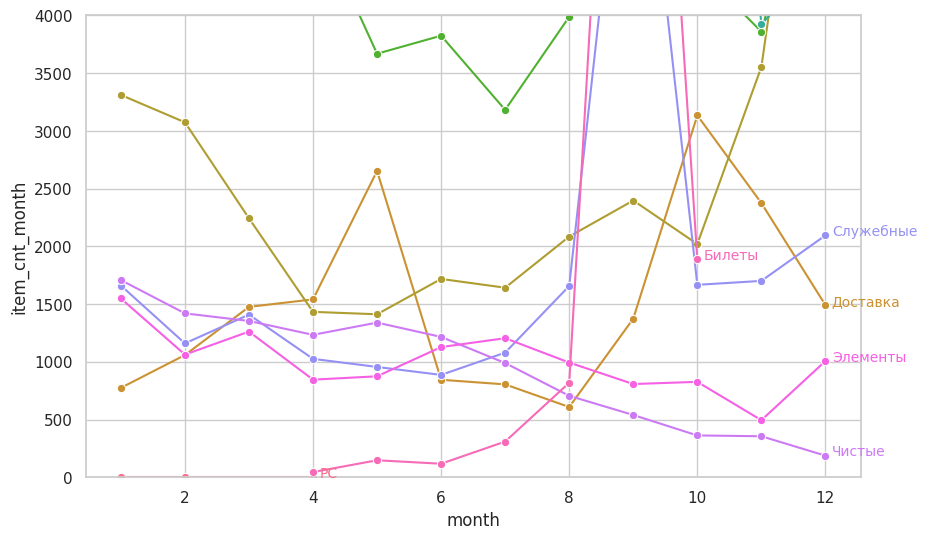

In [45]:
plot_colored_lines(data=grouped_month_cat,x_name='month', y_name='item_cnt_month', hue_name='super_category',ylim=4000)

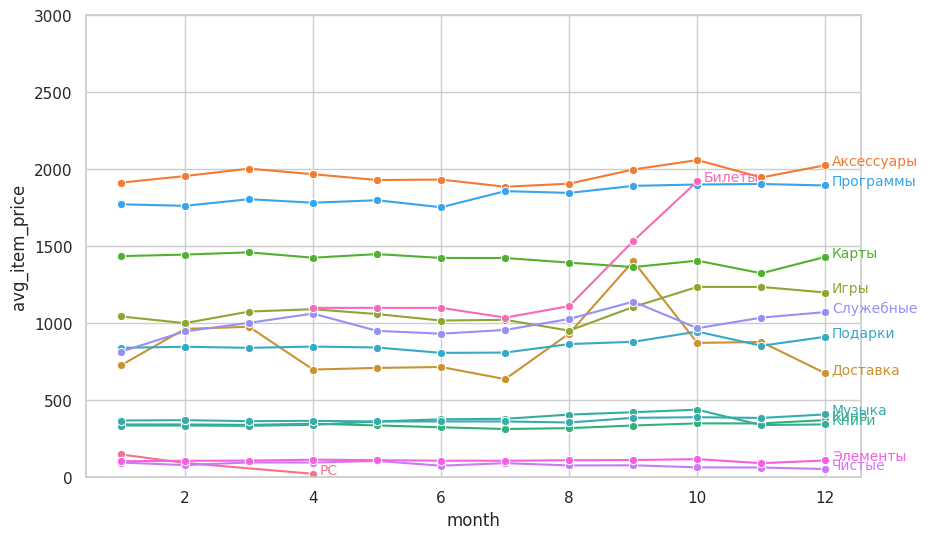

In [46]:
plot_colored_lines(data=grouped_month_cat,x_name='month', y_name='avg_item_price', hue_name='super_category',ylim=3000)

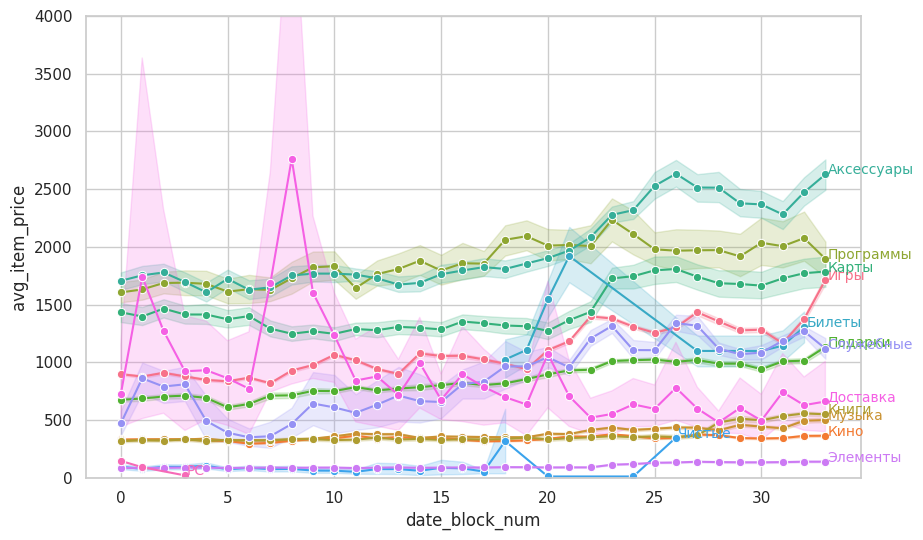

In [47]:
plot_colored_lines(data=grouped,x_name='date_block_num', y_name='avg_item_price', hue_name='super_category',ylim=4000)#avaraged by all products with super_category

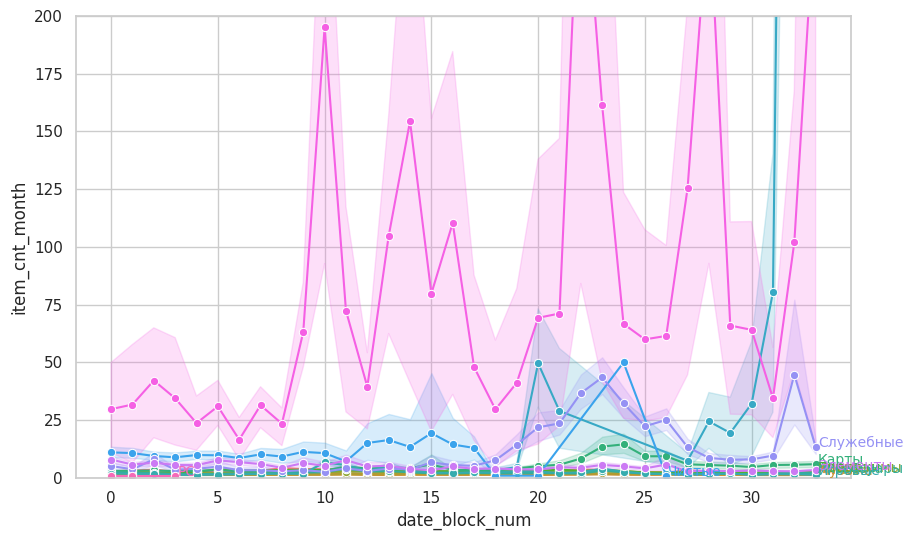

In [48]:
plot_colored_lines(data=grouped,x_name='date_block_num', y_name='item_cnt_month', hue_name='super_category',ylim=200)#avaraged by all products with super_category

In [49]:
df = grouped
categories_to_draw=np.random.choice(df['item_category_name'].unique(),size=1)

In [50]:
grouped_selected = grouped[grouped['item_category_name'].isin(categories_to_draw)]

In [51]:
#sorted(grouped_selected['date_block_num'].unique())

In [52]:
def define_year(block_num):
    if block_num < 12:
        return 2013

    if block_num < 24:
        return 2014

    if block_num < 36:
        return 2015

    

In [53]:
grouped_selected['year'] = grouped_selected['date_block_num'].apply(define_year)

/tmp/ipykernel_6329/3962848765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_selected['year'] = grouped_selected['date_block_num'].apply(define_year)


In [54]:
grouped_selected

,shop_id,item_id,date_block_num,avg_item_price,item_cnt_month,item_category_name,month,super_category,year
9277,2,9327,8,449.0,2.0,Подарки - Сувениры (в навеску),9,Подарки,2013
9278,2,9336,0,399.0,1.0,Подарки - Сувениры (в навеску),1,Подарки,2013
9279,2,9336,2,399.0,1.0,Подарки - Сувениры (в навеску),3,Подарки,2013
9280,2,9343,19,579.0,1.0,Подарки - Сувениры (в навеску),8,Подарки,2014
9281,2,9355,21,349.0,1.0,Подарки - Сувениры (в навеску),10,Подарки,2014
...,...,...,...,...,...,...,...,...,...
1604524,59,18042,31,299.0,2.0,Подарки - Сувениры (в навеску),8,Подарки,2015
1604525,59,18043,29,299.0,1.0,Подарки - Сувениры (в навеску),6,Подарки,2015
1604526,59,18043,30,299.0,1.0,Подарки - Сувениры (в навеску),7,Подарки,2015
1604527,59,18045,31,299.0,1.0,Подарки - Сувениры (в навеску),8,Подарки,2015


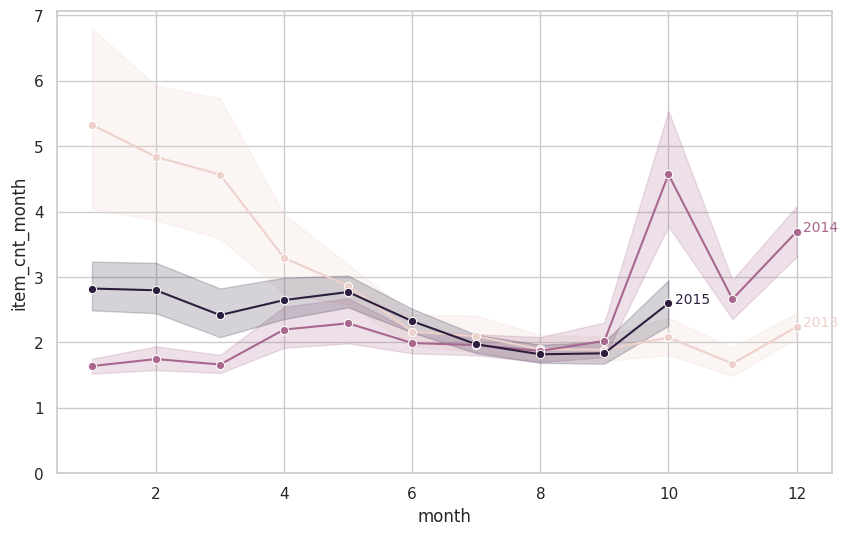

In [55]:
plot_colored_lines(data=grouped_selected,x_name='month', y_name='item_cnt_month', hue_name='year',ylim=None)#Avaraged by all products with item_category_name 

In [56]:
super_categories_to_draw=np.random.choice(df['super_category'].unique(),size=1)
super_categories_to_draw

array(['Билеты'], dtype=object)

In [57]:
grouped_selected_super = grouped[grouped['super_category'].isin(super_categories_to_draw)]


In [58]:
grouped_selected_super['year'] = grouped_selected_super['date_block_num'].apply(define_year)

/tmp/ipykernel_6329/1482604406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_selected_super['year'] = grouped_selected_super['date_block_num'].apply(define_year)


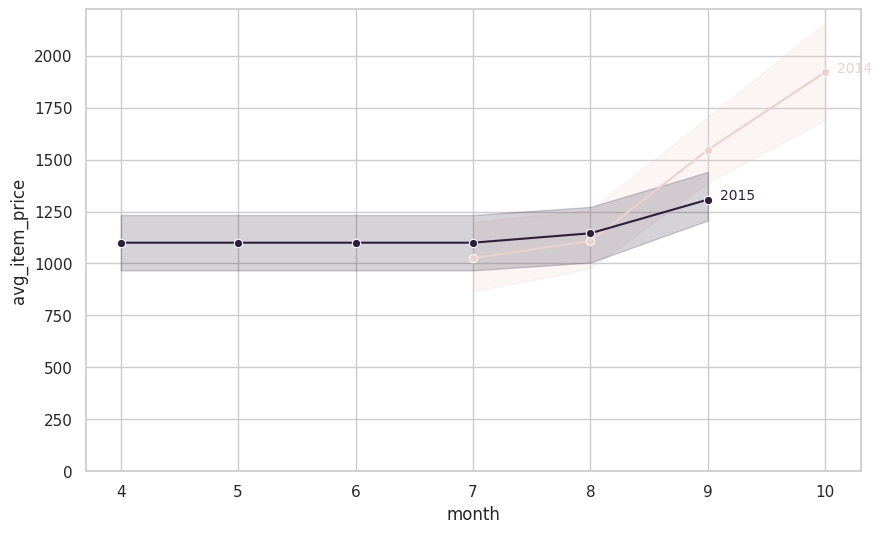

In [59]:
plot_colored_lines(data=grouped_selected_super,x_name='month', y_name='avg_item_price', hue_name='year',ylim=None)#Avaraged by all products with super_category 

In [60]:
grouped_shops=grouped.merge(shops, how='left')
grouped_shops.isna().sum()

shop_id               0
item_id               0
date_block_num        0
avg_item_price        0
item_cnt_month        0
item_category_name    0
month                 0
super_category        0
shop_name             0
dtype: int64

In [61]:
grouped_shops.shop_name.unique()

array(['Адыгея ТЦ "Мега"', 'Балашиха ТРК "Октябрь-Киномир"',
       'Волжский ТЦ "Волга Молл"', 'Вологда ТРЦ "Мармелад"',
       'Воронеж (Плехановская, 13)', 'Воронеж ТРЦ "Максимир"',
       'Воронеж ТРЦ Сити-Парк "Град"', 'Выездная Торговля',
       'Жуковский ул. Чкалова 39м²', 'Интернет-магазин ЧС',
       'Казань ТЦ "Бехетле"', 'Казань ТЦ "ПаркХаус" II',
       'Калуга ТРЦ "XXI век"', 'Коломна ТЦ "Рио"',
       'Красноярск ТЦ "Взлетка Плаза"', 'Красноярск ТЦ "Июнь"',
       'Курск ТЦ "Пушкинский"', 'Москва "Распродажа"',
       'Москва МТРЦ "Афи Молл"', 'Москва Магазин С21',
       'Москва ТК "Буденовский" (пав.А2)',
       'Москва ТК "Буденовский" (пав.К7)', 'Москва ТРК "Атриум"',
       'Москва ТЦ "Ареал" (Беляево)', 'Москва ТЦ "МЕГА Белая Дача II"',
       'Москва ТЦ "МЕГА Теплый Стан" II',
       'Москва ТЦ "Новый век" (Новокосино)', 'Москва ТЦ "Перловский"',
       'Москва ТЦ "Семеновский"', 'Москва ТЦ "Серебряный Дом"',
       'Мытищи ТРК "XL-3"', 'Н.Новгород ТРЦ "РИО"',
   

In [62]:
grouped_shops

,shop_id,item_id,date_block_num,avg_item_price,item_cnt_month,item_category_name,month,super_category,shop_name
0,2,27,0,2499.0,1.0,Игры - PS3,1,Игры,"Адыгея ТЦ ""Мега"""
1,2,27,17,498.0,1.0,Игры - PS3,6,Игры,"Адыгея ТЦ ""Мега"""
2,2,30,2,359.0,1.0,Кино - DVD,3,Кино,"Адыгея ТЦ ""Мега"""
3,2,30,5,399.0,1.0,Кино - DVD,6,Кино,"Адыгея ТЦ ""Мега"""
4,2,30,15,169.0,1.0,Кино - DVD,4,Кино,"Адыгея ТЦ ""Мега"""
...,...,...,...,...,...,...,...,...,...
1608220,59,22164,27,699.0,2.0,Кино - Blu-Ray,4,Кино,"Ярославль ТЦ ""Альтаир"""
1608221,59,22164,30,699.0,1.0,Кино - Blu-Ray,7,Кино,"Ярославль ТЦ ""Альтаир"""
1608222,59,22167,9,299.0,1.0,Книги - Методические материалы 1С,10,Книги,"Ярославль ТЦ ""Альтаир"""
1608223,59,22167,11,299.0,2.0,Книги - Методические материалы 1С,12,Книги,"Ярославль ТЦ ""Альтаир"""


In [98]:
grouped['city'] = grouped_shops['shop_name'].apply(lambda a:a.split()[0])

In [63]:
grouped_shops['city'] = grouped_shops['shop_name'].apply(lambda a:a.split()[0])

In [64]:
grouped_shops_city = grouped_shops.groupby(['city','super_category','date_block_num']).agg({'avg_item_price':'mean','item_cnt_month':'mean'})

In [65]:
grouped_shops_city

avg_item_price  item_cnt_month
city      super_category date_block_num                                
Адыгея    Аксессуары     0                  1822.868968        2.481481
                         1                  1466.666667        1.750000
                         2                  2099.055556        1.500000
                         3                  1707.196078        1.647059
                         4                  1792.833333        1.466667
...                                                 ...             ...
Ярославль Элементы       29                  119.000000        2.500000
                         30                  119.000000        6.000000
                         31                  139.000000        3.333333
                         32                  139.000000        2.333333
                         33                  139.000000        3.000000

[10072 rows x 2 columns]

In [66]:
grouped_shops_city=grouped_shops_city.reset_index()

In [67]:
super_categories_to_draw=np.random.choice(grouped_shops_city['super_category'].unique(),size=1)
super_categories_to_draw

array(['Игры'], dtype=object)

In [68]:
cities_to_draw=np.random.choice(grouped_shops_city['city'].unique(),size=5)
cities_to_draw

array(['Ярославль', 'Жуковский', 'Вологда', 'Калуга', 'Выездная'],
      dtype=object)

In [69]:
df=grouped_shops_city[ (grouped_shops_city['super_category']==super_categories_to_draw[0]) & ((grouped_shops_city['city'].isin(cities_to_draw)))]

SUPER CATEGORY: ['Игры']


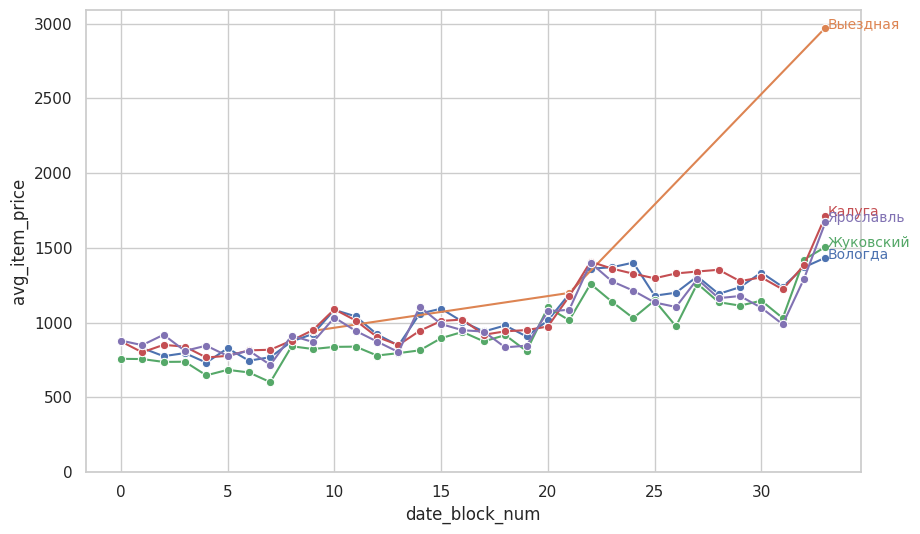

In [70]:
print('SUPER CATEGORY:', super_categories_to_draw)
plot_colored_lines(data=
                   df,
                   x_name='date_block_num',
                   y_name='avg_item_price',
                   hue_name='city',
                   ylim=None)#Avaraged by all products with super_category 

In [71]:
grouped_shops_city_avg_all_super_cat = grouped_shops.groupby(['city','date_block_num']).agg({'avg_item_price':'mean','item_cnt_month':'mean'})

In [72]:
grouped_shops_city_avg_all_super_cat=grouped_shops_city_avg_all_super_cat.reset_index()

In [73]:
cities_to_draw=np.random.choice(grouped_shops_city_avg_all_super_cat['city'].unique(),size=5)
cities_to_draw

array(['Волжский', 'Омск', 'Уфа', 'Ярославль', 'Чехов'], dtype=object)

In [74]:
df = grouped_shops_city_avg_all_super_cat[ (grouped_shops_city_avg_all_super_cat['city'].isin(cities_to_draw))]

In [75]:
df

,city,date_block_num,avg_item_price,item_cnt_month
68,Волжский,0,685.429423,1.995287
69,Волжский,1,674.496650,1.939048
70,Волжский,2,693.076920,2.000967
71,Волжский,3,727.975806,1.322581
72,Волжский,4,799.746092,1.669421
...,...,...,...,...
966,Ярославль,29,984.926987,1.681400
967,Ярославль,30,934.520738,1.688663
968,Ярославль,31,894.792472,2.050590
969,Ярославль,32,1136.298078,1.863544


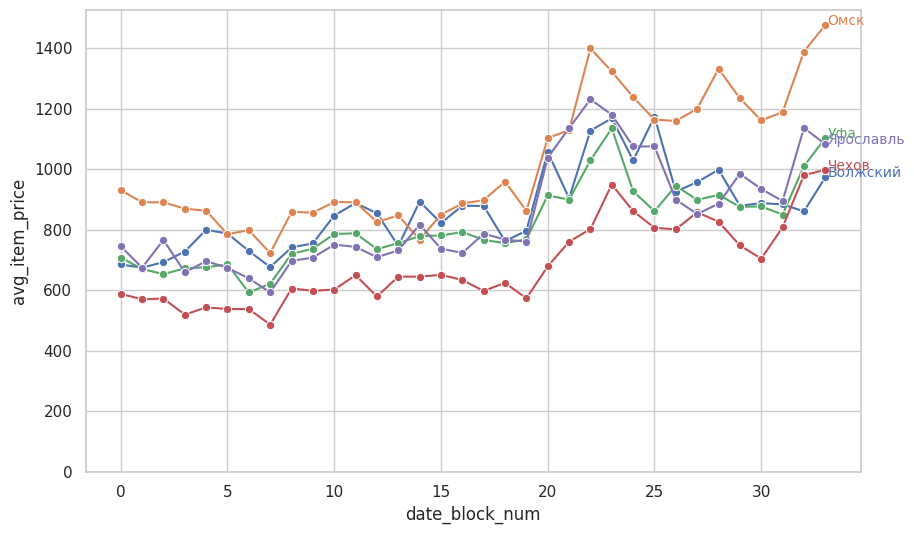

In [76]:
plot_colored_lines(data=
                   df,
                   x_name='date_block_num',
                   y_name='avg_item_price',
                   hue_name='city',
                   ylim=None)#Avaraged by all products with super_category 

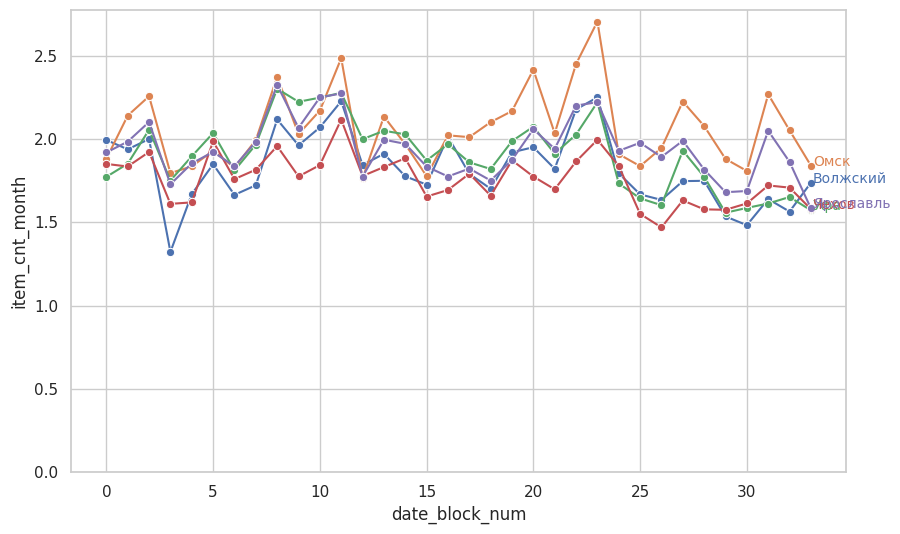

In [77]:
plot_colored_lines(data=
                   df,
                   x_name='date_block_num',
                   y_name='item_cnt_month',
                   hue_name='city',
                   ylim=None)#Avaraged by all products with super_category 

In [78]:
grouped

,shop_id,item_id,date_block_num,avg_item_price,item_cnt_month,item_category_name,month,super_category
0,2,27,0,2499.0,1.0,Игры - PS3,1,Игры
1,2,27,17,498.0,1.0,Игры - PS3,6,Игры
2,2,30,2,359.0,1.0,Кино - DVD,3,Кино
3,2,30,5,399.0,1.0,Кино - DVD,6,Кино
4,2,30,15,169.0,1.0,Кино - DVD,4,Кино
...,...,...,...,...,...,...,...,...
1608220,59,22164,27,699.0,2.0,Кино - Blu-Ray,4,Кино
1608221,59,22164,30,699.0,1.0,Кино - Blu-Ray,7,Кино
1608222,59,22167,9,299.0,1.0,Книги - Методические материалы 1С,10,Книги
1608223,59,22167,11,299.0,2.0,Книги - Методические материалы 1С,12,Книги


In [79]:
items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [80]:
df = grouped
df['item_name'] = df.merge(items)['item_name']

In [81]:
cat_to_draw=np.random.choice(df['item_category_name'].unique(),size=1)[0]
cat_to_draw

'Программы - Обучающие (Цифра)'

In [82]:
df = df[df['item_category_name'] == cat_to_draw]

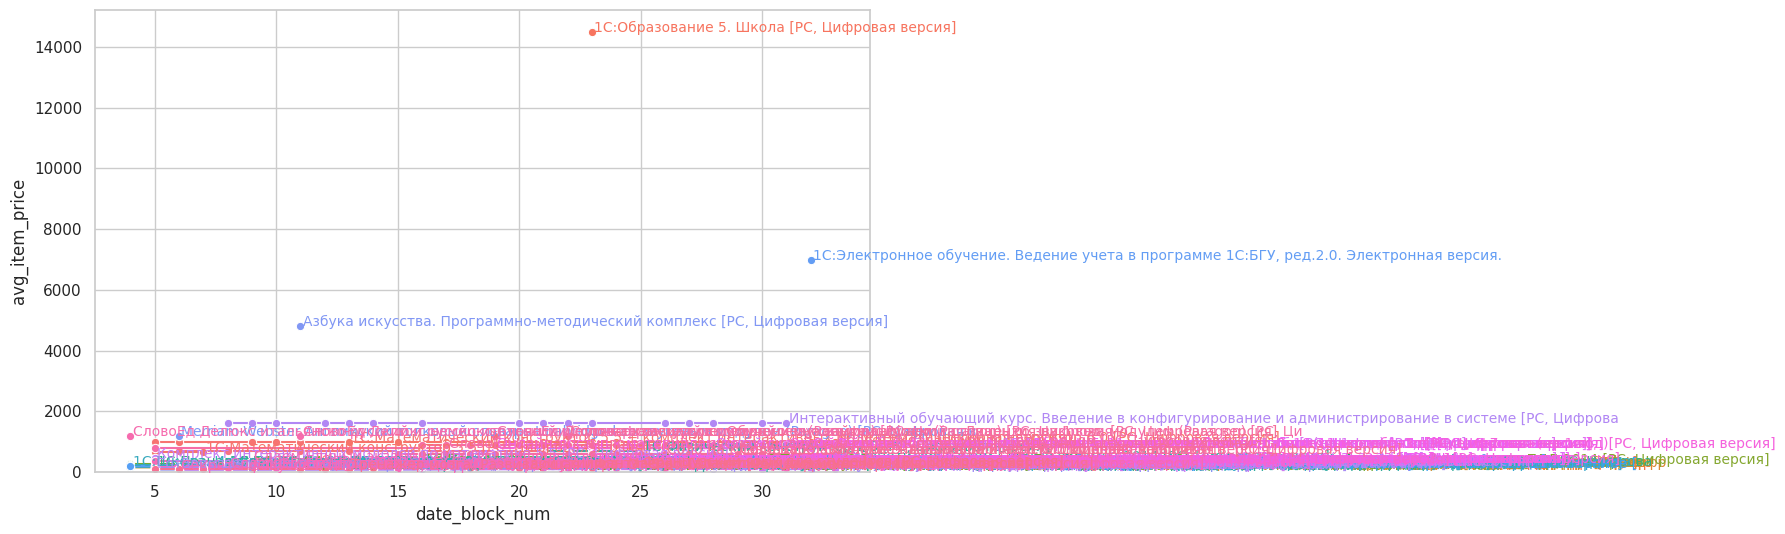

In [83]:
plot_colored_lines(data=
                   df,
                   x_name='date_block_num',
                   y_name='avg_item_price',
                   hue_name='item_name',
                   ylim=None)#Avaraged by all products with super_category 


In [90]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [99]:
def scatter_on_cat_cat(feat1, feat2):
    sns.scatterplot(x=le.fit_transform(grouped[feat1]),y=le.fit_transform(grouped[feat2]))

In [105]:
def scatter_on_cat_count(feat1, feat2):
    avg = grouped.groupby(feat1).agg({feat2:'mean'}).reset_index()
    X = avg[feat1]
    y=avg[feat2]
    sns.scatterplot(x=le.fit_transform(X),y=y)

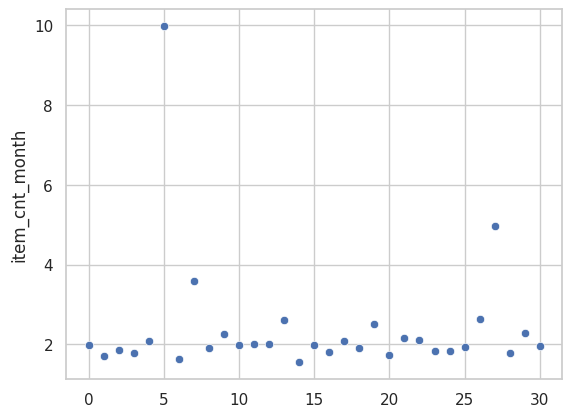

In [106]:
scatter_on_cat_count('city','item_cnt_month')

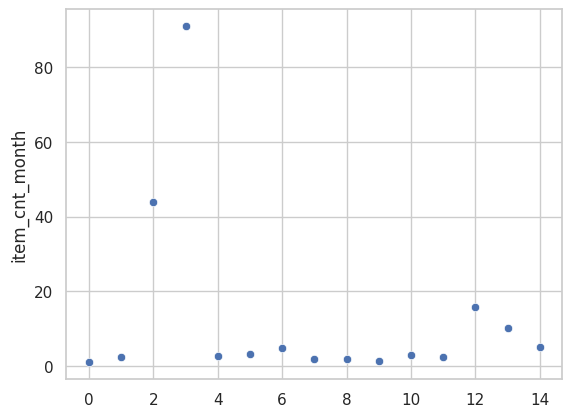

In [107]:
scatter_on_cat_count('super_category','item_cnt_month')

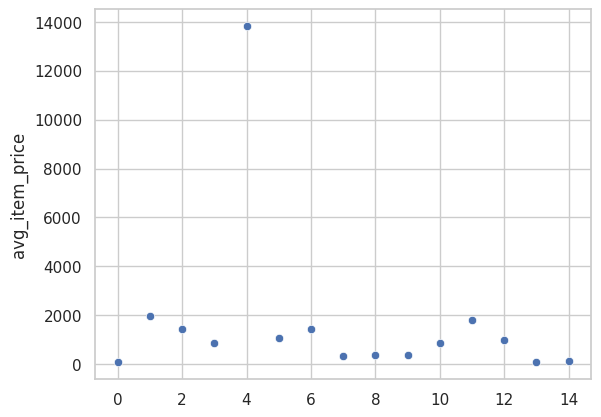

In [109]:
scatter_on_cat_count('super_category','avg_item_price')